#  Verifying the Inverse Square Law

###### Jelena Colon and Chelsey McMichael

# Abstract

This experiment indirectly confirms the validity of the inverse square law through the use of light. The intensity of one quantity varies by the inverse square of another quantity. Particularly, the experiment was performed in two parts. In the first half of the experiment, a diffraction gratings apparatus with a laser was put to use. The area of the square provided a measurement that could be used to approximate the intensity of light by comparing the areas at varying distances from the board. Afterwards, the Stefan-Boltzmann lamp and other equipment was used to reveal how light intensity decreased as the inverse square of the distance from the source. The intensity of the radiation emmitted by the lamp was measured and compared at various distances. The inverse square law proved to be valid based on the data collected when it was analyzed in the form of graphs in which each one was fitted. The graphs verify the inverse square law in an indirect way by revealing that each graph with an inverse square distance was linear. In both parts of the experiment, the measured intensity with relation to distance should be proportional to the inverse square of the distance and validate the inverse square law.

# Introduction

The inverse square law is a principle in which a specified physical quantity's intensity is inversely related to the squared value of another quantity. The fact that the intensity of light and other quantities such as sound decreases as the distance (r) gets larger is intuitively acceptable. In everyday life, the inverse proportionality of light or sound with distance is experienced frequently. However, the quantitative relationship between the two is interestingly a constant of (1/r^2). The inverse square law is best explained using the geometry of a sphere. Luckily, the area of a square and its spherical cap are proportional quantities, thus the inverse square law can be confirmed by measuring the area of a square.  The inverse square law is applicable to physical quantities that have an inverse-square relationship in areas such as gravity, electric field, light, sound, and radiation.    

# Experiment and Data

To begin this experiment, the lab set up was constructed out of a rolling desk with a laser elevated on level books. In front of the laser, there was a stand with a clasp holding two perpendicular difraction gratings each made up of 13,700 lines. As a test, the laser path traveled through the diffraction grating apparatus and was shown to have nine laser spots that looked perfectly symmetric. If the diffraction gratings were not perpendicular, this square made up of nine laser dots would have resembled a parallelogram. Or, if the laser beam was not perpendicular to the diffraction gratings, the laser spots would have been elongated. 

The laser spots were projected unto a chalk board that was perpendicular to the floor. After verifying the laser-diffraction grating apparatus was set up correctly, the experiment began with ten centimeter inetervals in which the laser was moved away from the chalk board with every set till it was one-hundred centimeters away. A meter stick was held perpendicular to the chalk board to measure the distance between the board and the diffraction gratings and was laid against a level base under the laser to make sure it was properly leveled. To be sure the distance between the board and the diffraction gratings was correct, this was measured from a top view between each set. Also, the ruler used to measure the length and width was eyed from a distance straight across from the board when measuring the laser spots, as a means to make sure it was measuring the proper distance between two dots. 

As stated previously, the laser spots were projected onto the board from ten centimeters away to one-hundred centimeters away in ten centimeter increments. With each increment, a ruler was used to measure the top right square's base and height. For consistency, the left side vertical part of this square was always used as the height and the bottom of this square was used as a base.    

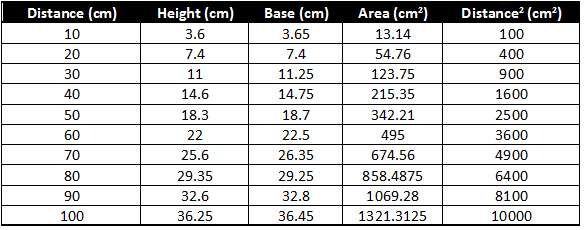

In this second experiment, there was a setup in which the meter stick was tapped to the table with a Stefan-Boltzmann Lamp at one end of the meter stick were the zero centimeter mark was lined up with the filament inside the lamp. Also, the radiation sensor attached to the voltmeter was to be lined up level to the lamp. Without turning on the power supply, the sensor was slid against the meter stick on ten centimeter increments beginning with ten centimeters and each length measured from had a zero mV reading on the voltmeter when the voltmeter was set at twenty millivolts.

The power supply was set to ten volts which illuminated the lamp, and we measured as we did previously by sliding the sensor away from the light source by ten centimeter increments. Between each set, it was important to record the voltage quickly because the temperature of the sensor could become no longer relatively constant, and become much to warm for an accurate depiction of what is happening. The sensor was always turned away from the light source between measurements and the senor measurments were taken quickly.


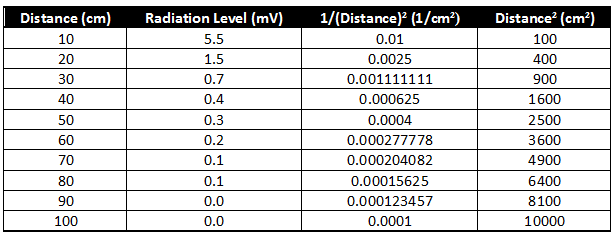

# Calculations

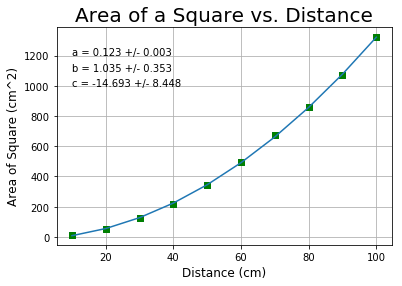

In [49]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

data=ascii.read("lab2part1.csv")

Distance=data['Distance']
Area=data['Area']

fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(Distance, Area, 'bs')
plt.axis('tight')
ax.grid()

plt.title('Area of a Square vs. Distance', fontsize=20)
plt.xlabel('Distance (cm)', fontsize=12)
plt.ylabel('Area of Square (cm^2)', fontsize=12)

def func(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(func, Distance, Area)



ax.plot(Distance, Area,'gs')
ax.plot(Distance, np.polyval(popt, Distance), '-')
ax.text(10, 1200, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(10, 1100, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
ax.text(10, 1000 , r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))

plt.show()

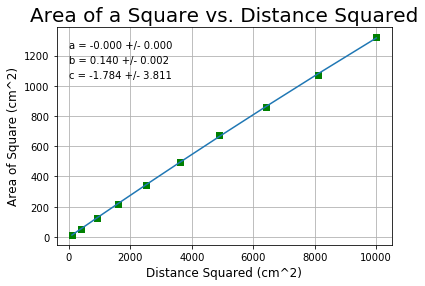

In [50]:
data=ascii.read("lab2part1.csv")

rsqr=data['rsqr']
Area=data['Area']

fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(rsqr, Area, 'gs')
plt.axis('tight')
plt.grid(True)

plt.title('Area of a Square vs. Distance Squared', fontsize=20)
plt.xlabel('Distance Squared (cm^2)', fontsize=12)
plt.ylabel('Area of Square (cm^2)', fontsize=12)

def func(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(func, rsqr, Area)



ax.plot(rsqr, Area,'gs')
ax.plot(rsqr, np.polyval(popt, rsqr), '-')
ax.text(10, 1250, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(10, 1150, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
ax.text(10, 1050 , r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))

plt.show()

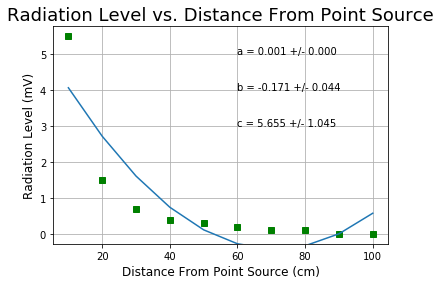

In [53]:
data=ascii.read("radiation_sensor.csv")

Rad=data['Rad']
X=data['X']

fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(X, Rad, 'gs')
plt.axis('tight')

plt.grid(True)

plt.title('Radiation Level vs. Distance From Point Source', fontsize=18)
plt.xlabel('Distance From Point Source (cm)', fontsize=12)
plt.ylabel('Radiation Level (mV)', fontsize=12)

def func(x, a, b, c):  
    return a*x**2 + b*x + c

popt, pcov = curve_fit(func, X, Rad)

ax.plot(X, np.polyval(popt, X), '-')
ax.text(60, 5, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(60, 4, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
ax.text(60, 3 , r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))


plt.show()

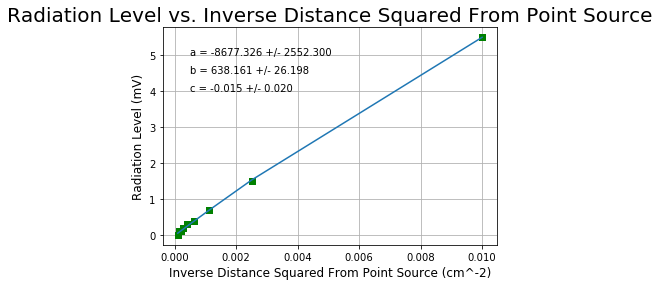

In [39]:
Invxsqr=data['Invxsqr']

fig=plt.figure()
ax = fig.add_subplot(111)
plt.plot(Invxsqr, Rad, 'gs')
plt.axis('tight')

plt.grid(True)

plt.title('Radiation Level vs. Inverse Distance Squared From Point Source', fontsize=20)
plt.xlabel('Inverse Distance Squared From Point Source (cm^-2)', fontsize=12)
plt.ylabel('Radiation Level (mV)', fontsize=12)


def func(x, a, b, c):
    return a*x**2  + b*x + c
    

popt, pcov = curve_fit(func, Invxsqr, Rad)


ax.plot(Invxsqr, Rad,'gs')
ax.plot(Invxsqr, np.polyval(popt, Invxsqr), '-')
ax.text(0.0005, 5, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
ax.text(0.0005, 4.5, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
ax.text(0.0005, 4 , r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))

plt.show()

# Conclusion

Based on the data and caclulations, this experiment is determined to be a successful comfirmation of the inverse sqaure law. In the first two graphs concerning area versus distance or the distance squared, the first one resembles more of a exponential growth graph, whereas the second one shows a more linear relationship between the two variables, and there is virtually no quadratic value for the value of a from the functions from the curve fit. Therefore, the inverse square law can be verified in this way because it turned out to be linear. The graphs made for the second half of the experiment also had similar outcomes to the previously described graphs. However, in the second inverse square graph, the quadratic value is large and negative, this can be attributed to the fact that many of radiation levels are small and extremly close in value. Still, the one comparing the radiation level to the distance from the point source resembled a more exponential slope, yet the one with the variables radiation level versus the inverse distance squared had a linear slope. This still supports the inverse square law indirectly.